In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
file_path = "../raw_data/queko-bss-16qbt/results.txt" 

In [3]:
data = []

with open(file_path, "r") as file:
    for line in file:
        match = re.search(r"(\d+)QBT_(\d+)CYC_QSE_(\d+)\.json:.*?poly_swap_count=(\d+),.*?single_trial_swap_count=(\d+),.*?multi_trial_swap_count=(\d+)", line)
        if match:
            qbt, cyc, qse_id, poly, single, multi = map(int, match.groups())
            label = f"{qse_id}_{cyc}" 
            data.append((cyc, qse_id, poly, single, multi, label))

data.sort()

In [4]:
x_labels = [item[5] for item in data] 
poly_swaps = [item[2] for item in data]
single_swaps = [item[3] for item in data]
multi_swaps = [item[4] for item in data]

In [24]:
poly_swaps_count = 0
single_swaps_count = 0
same_swaps_count = 0
ch7al_fatna = 0
ch7al_fotnah = 0
for item in data:
    if item[2] > item[3]:
        poly_swaps_count += 1
        ch7al_fotnah = max(ch7al_fotnah,item[3] - item[2])
    elif item[2] < item[3]:
        single_swaps_count += 1
        ch7al_fatna = max(ch7al_fatna,item[2] - item[3])
    else:
        same_swaps_count += 1
    

        
print(f"poly_swaps_count: {poly_swaps_count}")
print(f"single_swaps_count: {single_swaps_count}")
print(f"same_swaps_count: {same_swaps_count}")

print(f"max ch7al fotnah : {ch7al_fotnah}")
print(f"max ch7al fatna : {ch7al_fatna}")

poly_swaps_count: 41
single_swaps_count: 47
same_swaps_count: 2
max ch7al fotnah : 90
max ch7al fatna : 308


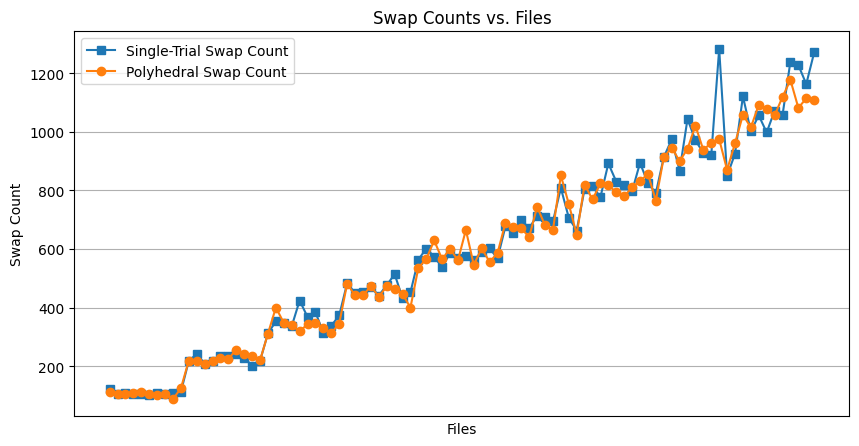

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(x_labels, single_swaps, marker='s', label="Single-Trial Swap Count")
#plt.plot(x_labels, multi_swaps, marker='^', label="Multi-Trial Swap Count")
plt.plot(x_labels, poly_swaps, marker='o', label="Polyhedral Swap Count")

plt.xlabel("Files")
plt.ylabel("Swap Count")
plt.title("Swap Counts vs. Files")
plt.xticks([], [])  
plt.legend()
plt.grid(True)
plt.show()
